# Добрый день!
# Представляю проект - временные ряды

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-библиотек" data-toc-modified-id="Загрузка-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка библиотек</a></span></li><li><span><a href="#Просмотр-данных" data-toc-modified-id="Просмотр-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Просмотр данных</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Общая-динамика-за-весь-период" data-toc-modified-id="Общая-динамика-за-весь-период-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Общая динамика за весь период</a></span></li><li><span><a href="#Скользящее-среднее" data-toc-modified-id="Скользящее-среднее-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Скользящее среднее</a></span></li><li><span><a href="#Тренды-и-сезонность." data-toc-modified-id="Тренды-и-сезонность.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Тренды и сезонность.</a></span></li><li><span><a href="#Выбор-интервала" data-toc-modified-id="Выбор-интервала-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Выбор интервала</a></span></li><li><span><a href="#Тест-Дики---Фуллера" data-toc-modified-id="Тест-Дики---Фуллера-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Тест Дики - Фуллера</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Признаки-для-модели" data-toc-modified-id="Признаки-для-модели-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Признаки для модели</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#LightGBM---градиентный-бустинг" data-toc-modified-id="LightGBM---градиентный-бустинг-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>LightGBM - градиентный бустинг</a></span></li><li><span><a href="#Итоги-по-всем-моделям" data-toc-modified-id="Итоги-по-всем-моделям-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Итоги по всем моделям</a></span></li></ul></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span></li><li><span><a href="#Общий-вывод-по-проекту" data-toc-modified-id="Общий-вывод-по-проекту-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод по проекту</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

# Описание данных

**Целевой признак - `num_orders` (от англ. number of orders, «число заказов»).**

`datetime` - дата и время заказа

`num_orders` - число заказов

### Загрузка библиотек

In [ ]:
# импорт библиотек

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import warnings
import math


from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import lightgbm as lgb
from catboost import CatBoostRegressor


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler,
                                   OneHotEncoder,
                                   OrdinalEncoder,
                                   LabelEncoder)

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split, TimeSeriesSplit

from sklearn.metrics import mean_squared_error

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

### Просмотр данных

In [ ]:
# чтение и загрузка файла - основной датасет
# сразу преобразуем столбец с датой и установим ее в качестве индекса

auto = pd.read_csv('/datasets/taxi.csv', sep=',', decimal = '.', parse_dates=[0], index_col = [0])
display(auto.head())
auto.shape

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


(26496, 1)

**Мы видим данные о заказах такси с периодичностью в 10 минут, которые представляют собой временной ряд.**

In [ ]:
# проверяем форматы данных

auto.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [ ]:
# проверяем пропуски в таблице

auto.isna().sum().sort_values(ascending=False)

num_orders    0
dtype: int64

**Данные загружены: всего 26 496 строк и 2 столбцa. Видим, что отсутствуют пропуски в данных**

**Форматы признаков определены верно**

In [ ]:
# cтастистический анализ данных

auto.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


Среднее количество заказов - 14, максимальное - 119, медиана на 13.

## Анализ

###  Общая динамика за весь период

In [ ]:
# в хронологическом ли порядке расположены даты и время

auto.sort_index(inplace=True)
print(auto.index.is_monotonic)

True


In [ ]:
# есть ли дублирующиеся временные отметки

auto.index.duplicated().sum()

0

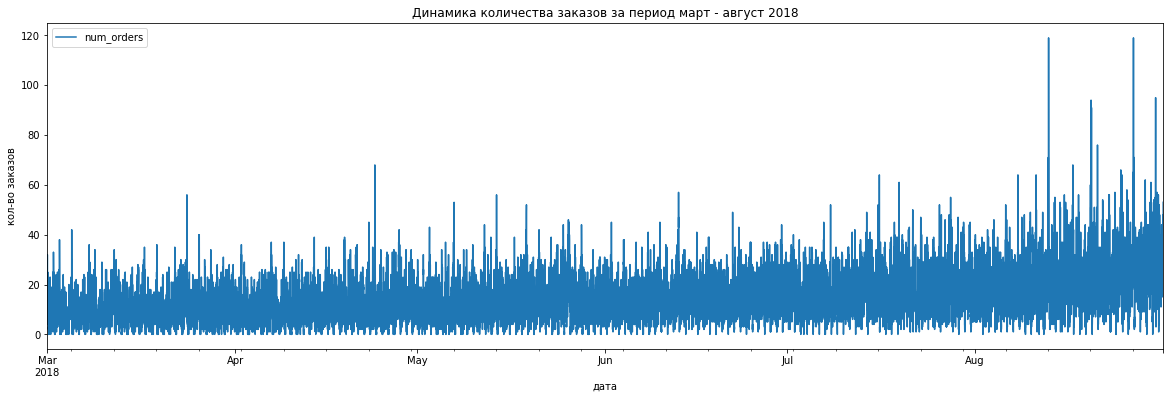

In [ ]:
# построим график временного ряда

figsize=(20,6)
auto.plot(figsize=figsize)

plt.ylabel('кол-во заказов')
plt.xlabel('дата')
plt.title('Динамика количества заказов за период март - август 2018')
plt.show();

График слишком "частый", поэтому проведем ресемплирование данных

In [ ]:
# ресемплирование данных в пересчете на день

auto_day = auto.resample('1D').sum()

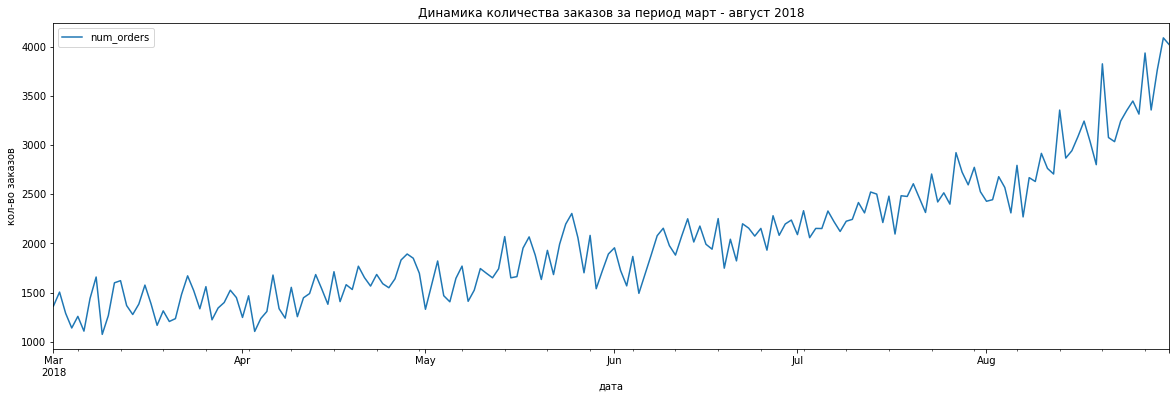

In [ ]:
# построим график временного ряда по ресемплированным данным

auto_day.plot(figsize=figsize)

plt.ylabel('кол-во заказов')
plt.xlabel('дата')
plt.title('Динамика количества заказов за период март - август 2018')
plt.show();

По графику видим восходящий тренд, основная динамика заказов приходится на летний период с июня по август. Это объясняется выскоим сезоном отпусков и поездок, а следовательно росту заказов такси в аэропорты.

### Скользящее среднее

Чтобы во временном ряду снизить колебания, применим скользящее среднее.

In [ ]:
auto_day['rolling_mean'] = auto_day['num_orders'].shift().rolling(10).mean()
auto_day['rolling_std'] = auto_day['num_orders'].shift().rolling(10).std()

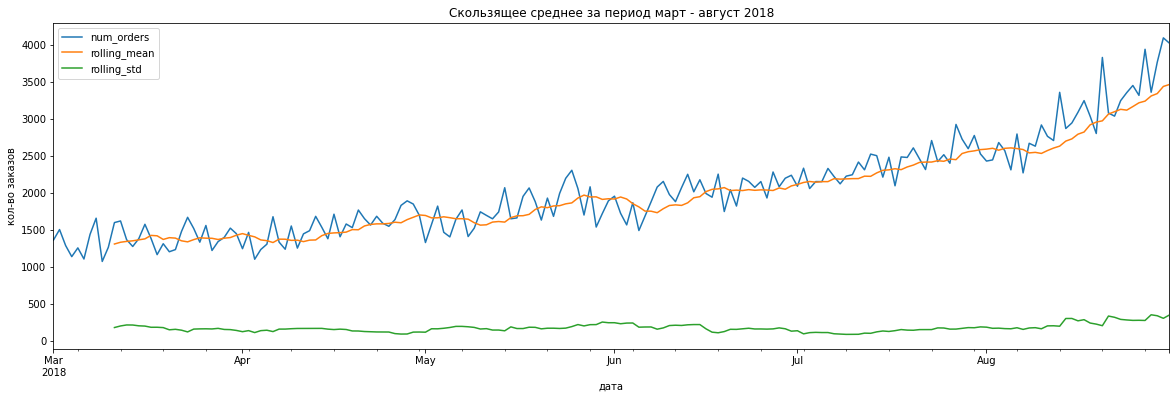

In [ ]:
# построим график временного ряда скользящее среднее

auto_day.plot(figsize=figsize)

plt.ylabel('кол-во заказов')
plt.xlabel('дата')
plt.title('Скользящее среднее за период март - август 2018')
plt.legend()
plt.show();

Так как среднее значение и стандартное отклонение растут в динамике, то ряд нестационарный.

### Тренды и сезонность.

Чтобы лучше понимать временной ряд, разберём тренды и сезонность.

**Тренд (англ. trend)** — плавное изменение среднего значения ряда без повторяющихся закономерностей.

**Сезонность (англ. seasonality)** — циклично повторяющиеся закономерности во временном ряду.

**Остаток (англ. residuals)** - это компонента, которая не объясняется трендом и сезонностью, это шум.

In [ ]:
# ресемплирование данных в пересчете на час
auto = auto.resample('1H').sum()
# декомпозиция
decomposed = seasonal_decompose(auto)


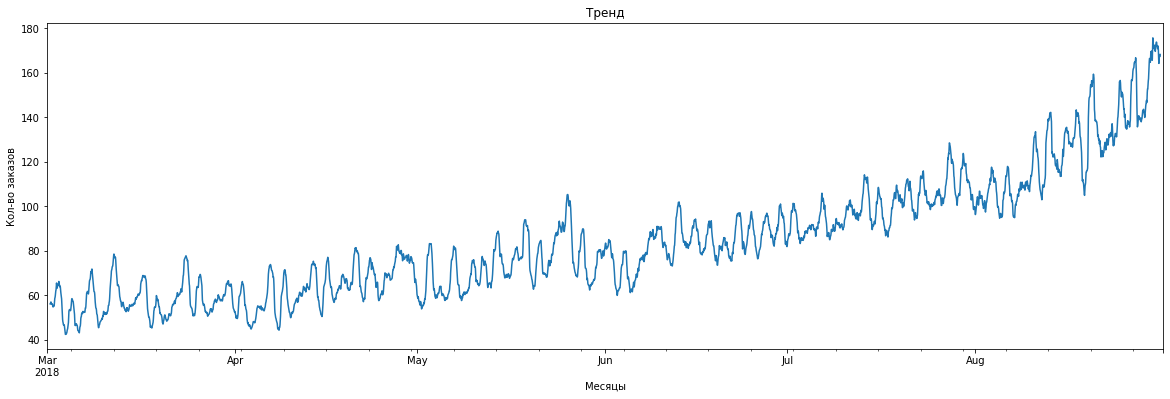

In [ ]:
#  построим тренд

decomposed.trend.plot(figsize=figsize)
plt.title('Тренд')
plt.xlabel('Месяцы')
plt.ylabel('Кол-во заказов')
plt.show()

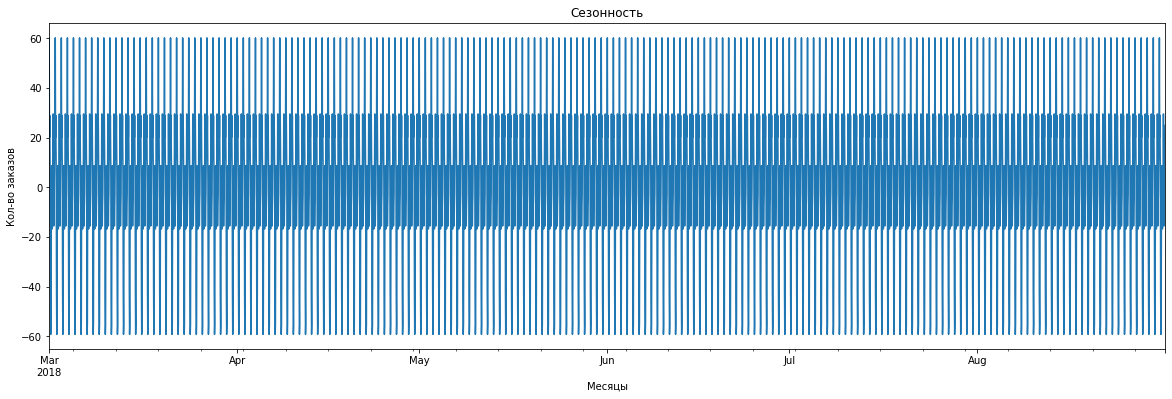

In [ ]:
# построим сезонность

decomposed.seasonal.plot(figsize=figsize)
plt.title('Сезонность')
plt.xlabel('Месяцы')
plt.ylabel('Кол-во заказов')
plt.show()

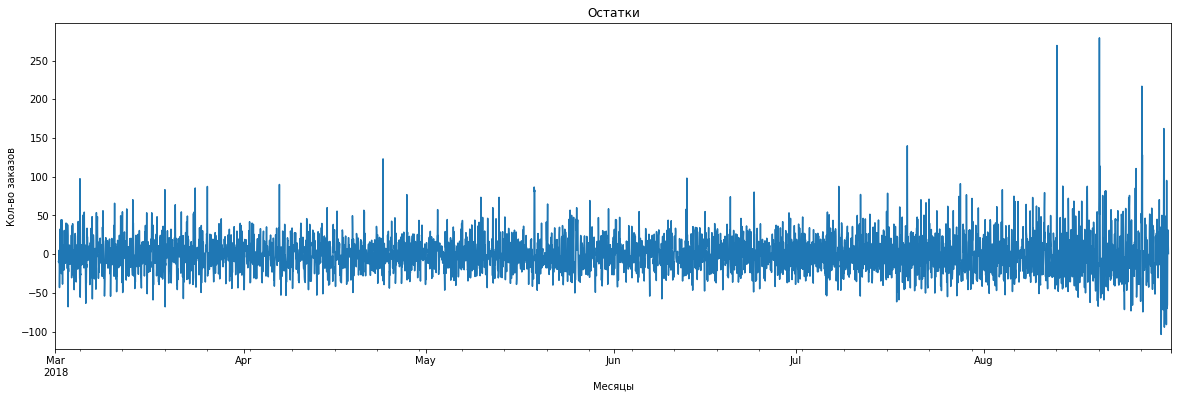

In [ ]:
# проверим остатки

decomposed.resid.plot(figsize=figsize)
plt.title('Остатки')
plt.xlabel('Месяцы')
plt.ylabel('Кол-во заказов')
plt.show()

### Выбор интервала

Так как нам необходимо спрогнозировать количество заказов на следующий час, то для дальнейшего анализа возьмем период в 1 месяц - август и ресемплируем его в пересчете на час.

In [ ]:
# ресемплирование данных в пересчете на час за август

auto_hour = auto.resample('1H').sum()
auto_aug = auto_hour['2018-08-01':]

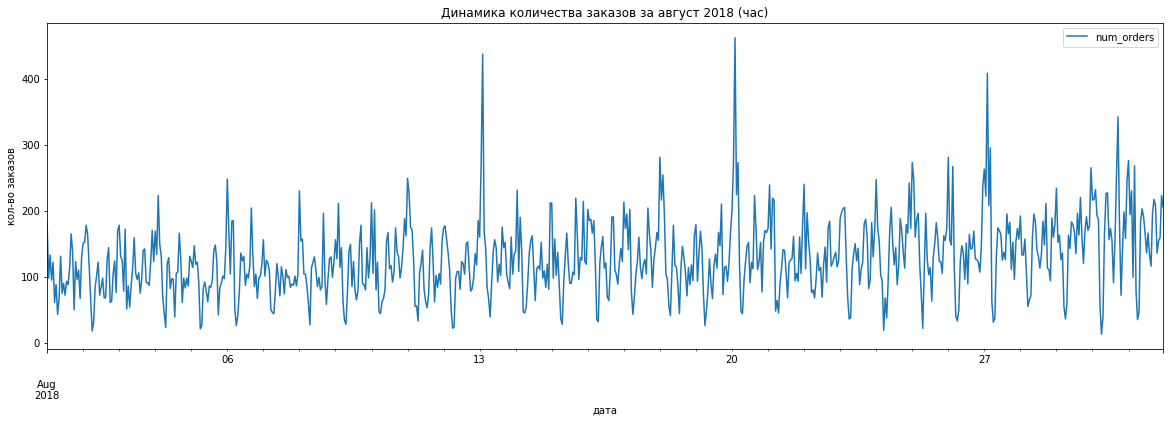

In [ ]:
# построим график временного ряда по ресемплированным данным

auto_aug.plot(figsize=figsize)

plt.ylabel('кол-во заказов')
plt.xlabel('дата')
plt.title('Динамика количества заказов за август 2018 (час)')
plt.show();

**Построим для этого периода декомпозицию (тренд, сезонность и остатки)**

In [ ]:
# декомпозиция
decomposed_aug = seasonal_decompose(auto_aug)

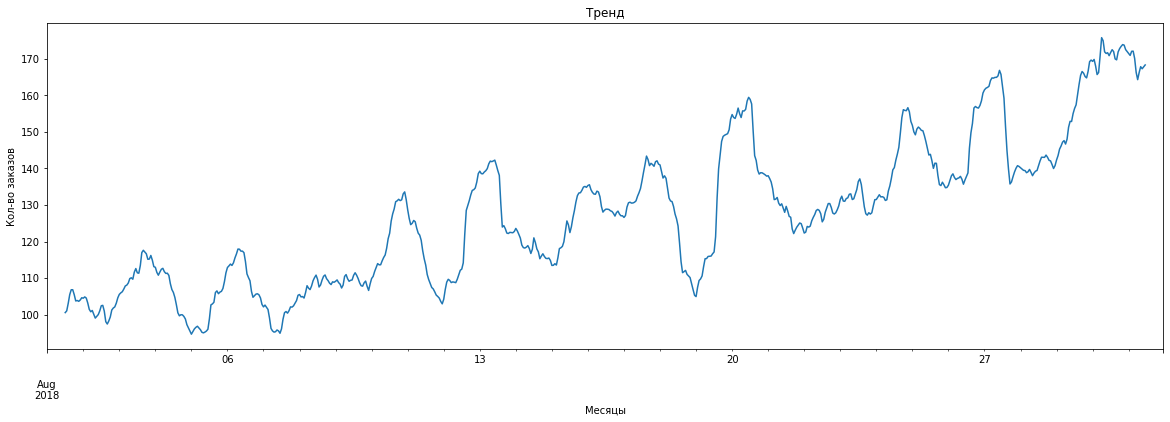

In [ ]:
#  построим тренд

decomposed_aug.trend.plot(figsize=figsize)
plt.title('Тренд')
plt.xlabel('Месяцы')
plt.ylabel('Кол-во заказов')
plt.show()

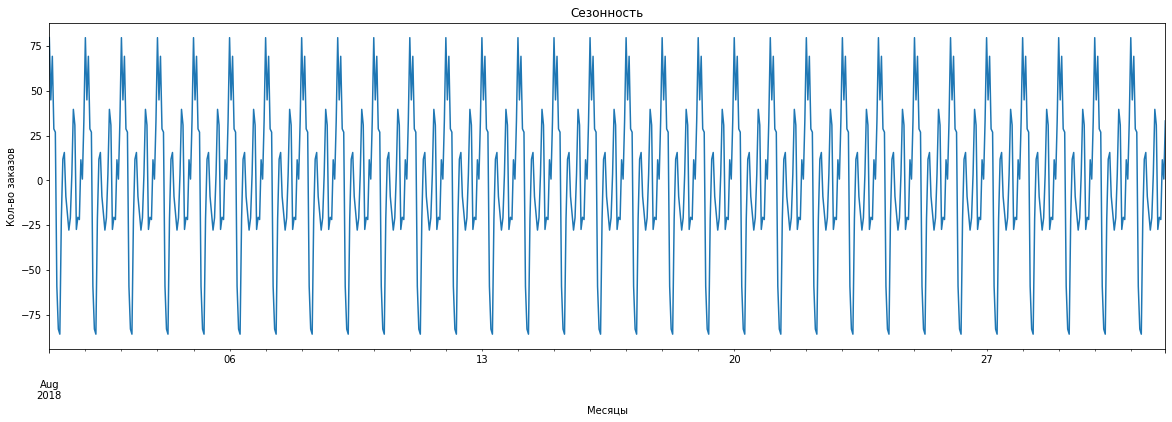

In [ ]:
# построим сезонность

decomposed_aug.seasonal.plot(figsize=figsize)
plt.title('Сезонность')
plt.xlabel('Месяцы')
plt.ylabel('Кол-во заказов')
plt.show()

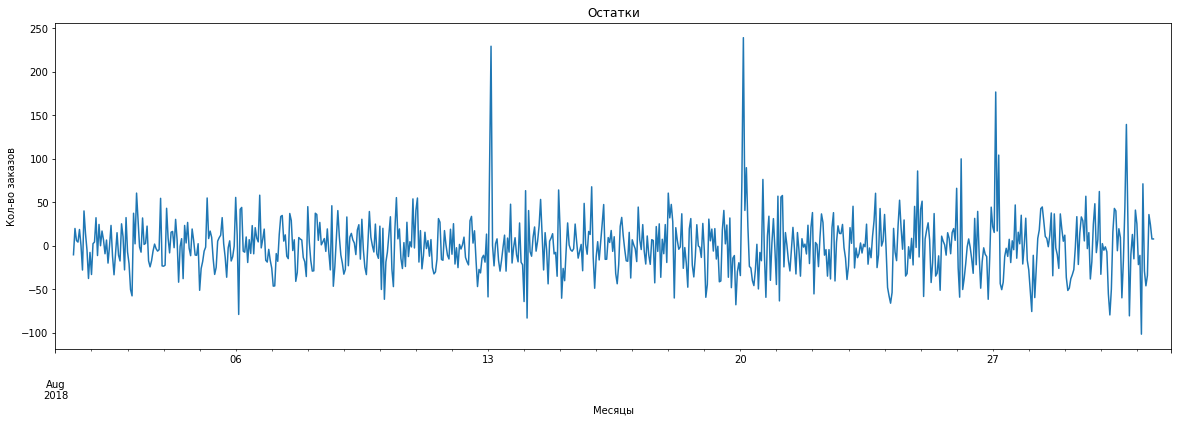

In [ ]:
# проверим остатки

decomposed_aug.resid.plot(figsize=figsize)
plt.title('Остатки')
plt.xlabel('Месяцы')
plt.ylabel('Кол-во заказов')
plt.show()

На графиках видим, что по понедельникам идет резкий рост заказов (6,13, 20 и 27 августа)

In [ ]:
# посмотрим подробнее на 2 дня окончания августа

auto_2d = auto_hour['2018-08-30':]

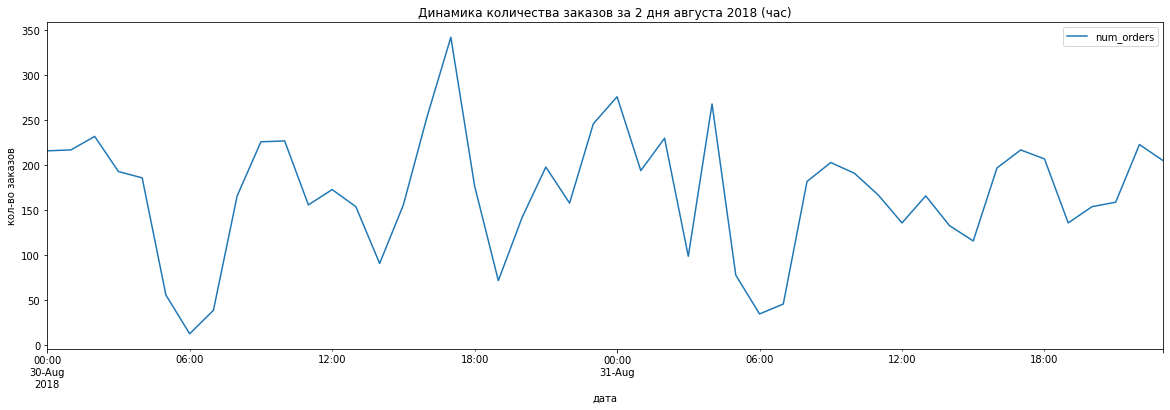

In [ ]:
# построим график временного ряда  за 2 дня

auto_2d.plot(figsize=figsize)

plt.ylabel('кол-во заказов')
plt.xlabel('дата')
plt.title('Динамика количества заказов за 2 дня августа 2018 (час)')
plt.show();

**Построим для этого периода в 2 дня декомпозицию (тренд, сезонность и остатки)**

In [ ]:
# декомпозиция
decomposed_2d = seasonal_decompose(auto_2d)

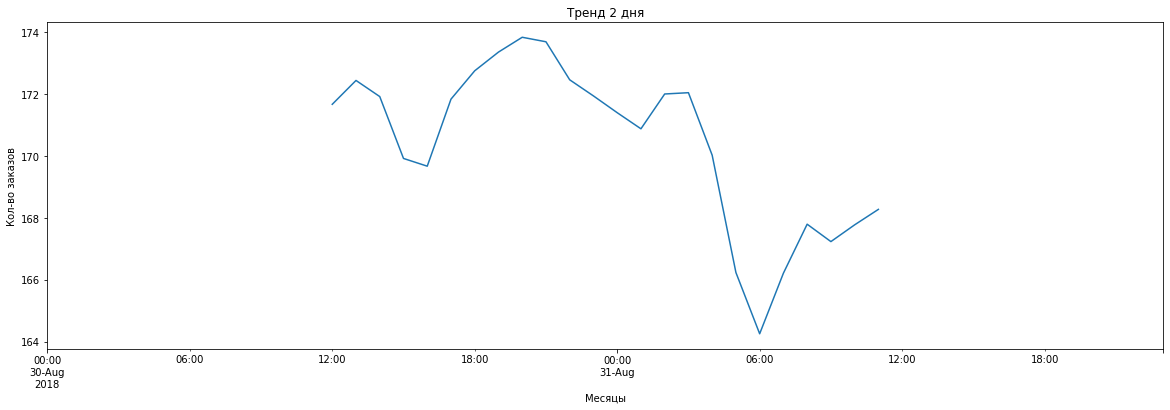

In [ ]:
#  построим тренд

decomposed_2d.trend.plot(figsize=figsize)
plt.title('Тренд 2 дня')
plt.xlabel('Месяцы')
plt.ylabel('Кол-во заказов')
plt.show()

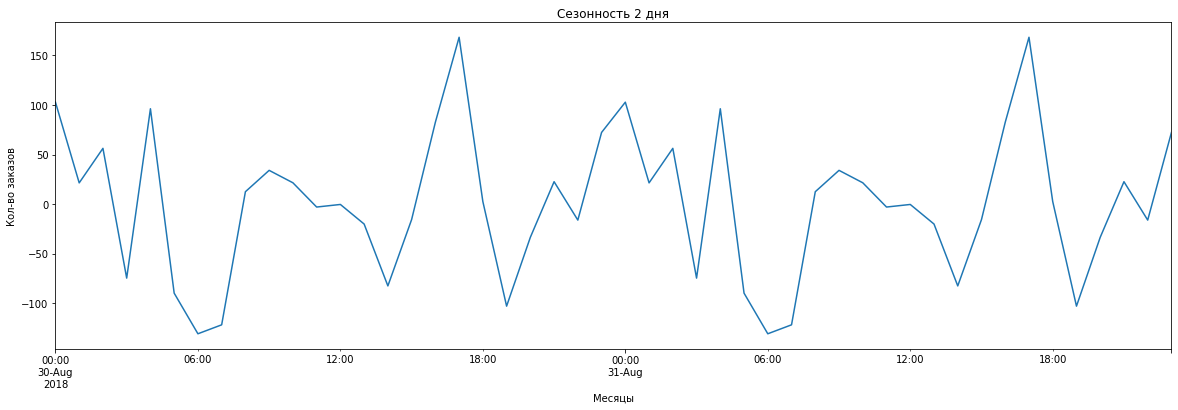

In [ ]:
# построим сезонность

decomposed_2d.seasonal.plot(figsize=figsize)
plt.title('Сезонность 2 дня')
plt.xlabel('Месяцы')
plt.ylabel('Кол-во заказов')
plt.show()

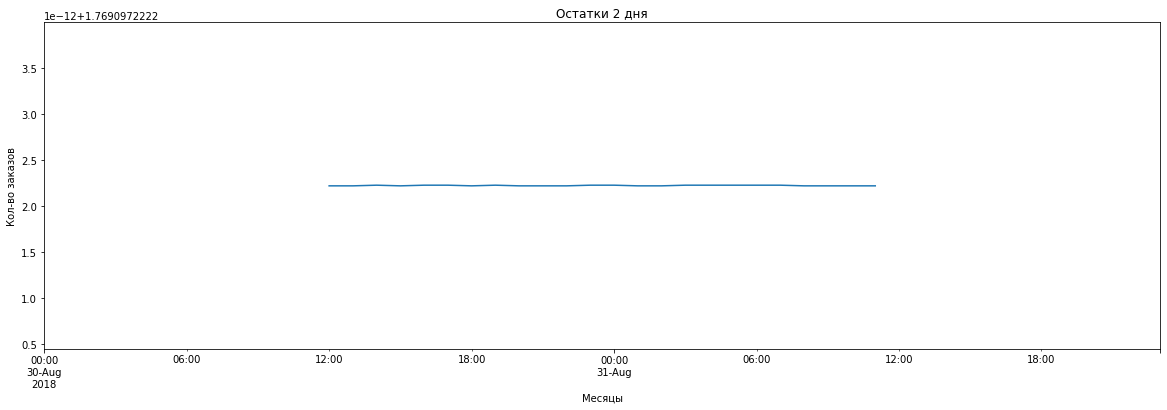

In [ ]:
# проверим остатки

decomposed_2d.resid.plot(figsize=figsize)
plt.title('Остатки 2 дня')
plt.xlabel('Месяцы')
plt.ylabel('Кол-во заказов')
plt.show()

**Вывод по разделу:**

1) Были загружены данные временного ряда по динамике количества заказов такси в аэропорты. Среднее количество заказов - 14, максимальное - 119, медиана на 13.

2) Анализ по графику показал восходящий тренд, основная динамика заказов приходится на летний период с июня по август. Это объясняется выскоим сезоном отпусков и поездок, а следовательно росту заказов такси в аэропорты.

3) Так как среднее значение и стандартное отклонение растут в динамике, то ряд нестационарный.

4) Тренды и сезонность показали, что по понедельникам идет резкий рост заказов (6, 13, 20 и 27 августа)

5) За август мы видим восходящий тренд с ускорением, так как новые максимумы выше предыдущих - происходит рост заказов каждую неделю.

6) Посмотрели данные за 2 суток до окончания августа (это получились дни четверг и пятнца). Эти дни достаточно показательны, так как к четвергу спадает рост числа заказов (к середине недели), а пятница как правило день перед выходными - пользуется популярностью, чтобы улететь на выходные.

7) Анализируя востребованность заказа такси по часам: в утренние часы с 06-00 до 9-00 идет рост числа заказов (клиенты выбирают для полета утренниче часы), а также пользуются популярностью вечерние рейсы - идет рост числа заказов в период с 19-00 до 00-00

### Тест Дики - Фуллера

In [ ]:
test = adfuller(auto)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']:
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -3.0689242890279558
p-value:  0.028940051402612906
Critical values:  {'1%': -3.431842162413052, '5%': -2.8621993540813637, '10%': -2.567120978470452}
единичных корней нет, ряд стационарен


**Так как p-value менее 5% (и равно 2,89%), то мы отвергаем нулевую гипотезу ( о нестацинарности ряда) и придерживаемся альтернативной гипотезе о том, что наш ряд стационарен.**

## Обучение

### Признаки для модели

In [ ]:
data = auto.copy()

In [ ]:
# создаем функцию с признаками для обучения модели

def make_features(data, max_lag, rolling_mean_size):

    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    # data['day'] = data.index.day
    # data['month'] = data.index.month

    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

    return data.dropna()

#data_new = make_features(data)

In [ ]:
# создаем признаки
make_features(data, 100, 100)


,num_orders,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,lag_31,lag_32,lag_33,lag_34,lag_35,lag_36,lag_37,lag_38,lag_39,lag_40,lag_41,lag_42,lag_43,lag_44,lag_45,lag_46,lag_47,lag_48,lag_49,lag_50,lag_51,lag_52,lag_53,lag_54,lag_55,lag_56,lag_57,lag_58,lag_59,lag_60,lag_61,lag_62,lag_63,lag_64,lag_65,lag_66,lag_67,lag_68,lag_69,lag_70,lag_71,lag_72,lag_73,lag_74,lag_75,lag_76,lag_77,lag_78,lag_79,lag_80,lag_81,lag_82,lag_83,lag_84,lag_85,lag_86,lag_87,lag_88,lag_89,lag_90,lag_91,lag_92,lag_93,lag_94,lag_95,lag_96,lag_97,lag_98,lag_99,lag_100,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-03-05 04:00:00,34,0,4,51.0,32.0,176.0,86.0,68.0,83.0,75.0,77.0,56.0,80.0,51.0,64.0,58.0,56.0,30.0,30.0,41.0,19.0,39.0,39.0,12.0,11.0,22.0,27.0,42.0,26.0,60.0,75.0,43.0,63.0,48.0,83.0,30.0,68.0,49.0,46.0,76.0,41.0,28.0,32.0,57.0,52.0,73.0,56.0,17.0,9.0,15.0,44.0,64.0,25.0,108.0,163.0,72.0,119.0,101.0,93.0,49.0,89.0,83.0,82.0,59.0,44.0,45.0,36.0,91.0,54.0,45.0,46.0,7.0,11.0,11.0,20.0,64.0,75.0,120.0,90.0,58.0,113.0,66.0,61.0,45.0,73.0,44.0,43.0,66.0,48.0,32.0,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,124.0,56.46
2018-03-05 05:00:00,16,0,5,34.0,51.0,32.0,176.0,86.0,68.0,83.0,75.0,77.0,56.0,80.0,51.0,64.0,58.0,56.0,30.0,30.0,41.0,19.0,39.0,39.0,12.0,11.0,22.0,27.0,42.0,26.0,60.0,75.0,43.0,63.0,48.0,83.0,30.0,68.0,49.0,46.0,76.0,41.0,28.0,32.0,57.0,52.0,73.0,56.0,17.0,9.0,15.0,44.0,64.0,25.0,108.0,163.0,72.0,119.0,101.0,93.0,49.0,89.0,83.0,82.0,59.0,44.0,45.0,36.0,91.0,54.0,45.0,46.0,7.0,11.0,11.0,20.0,64.0,75.0,120.0,90.0,58.0,113.0,66.0,61.0,45.0,73.0,44.0,43.0,66.0,48.0,32.0,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,55.56
2018-03-05 06:00:00,3,0,6,16.0,34.0,51.0,32.0,176.0,86.0,68.0,83.0,75.0,77.0,56.0,80.0,51.0,64.0,58.0,56.0,30.0,30.0,41.0,19.0,39.0,39.0,12.0,11.0,22.0,27.0,42.0,26.0,60.0,75.0,43.0,63.0,48.0,83.0,30.0,68.0,49.0,46.0,76.0,41.0,28.0,32.0,57.0,52.0,73.0,56.0,17.0,9.0,15.0,44.0,64.0,25.0,108.0,163.0,72.0,119.0,101.0,93.0,49.0,89.0,83.0,82.0,59.0,44.0,45.0,36.0,91.0,54.0,45.0,46.0,7.0,11.0,11.0,20.0,64.0,75.0,120.0,90.0,58.0,113.0,66.0,61.0,45.0,73.0,44.0,43.0,66.0,48.0,32.0,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,54.87
2018-03-05 07:00:00,14,0,7,3.0,16.0,34.0,51.0,32.0,176.0,86.0,68.0,83.0,75.0,77.0,56.0,80.0,51.0,64.0,58.0,56.0,30.0,30.0,41.0,19.0,39.0,39.0,12.0,11.0,22.0,27.0,42.0,26.0,60.0,75.0,43.0,63.0,48.0,83.0,30.0,68.0,49.0,46.0,76.0,41.0,28.0,32.0,57.0,52.0,73.0,56.0,17.0,9.0,15.0,44.0,64.0,25.0,108.0,163.0,72.0,119.0,101.0,93.0,49.0,89.0,83.0,82.0,59.0,44.0,45.0,36.0,91.0,54.0,45.0,46.0,7.0,11.0,11.0,20.0,64.0,75.0,120.0,90.0,58.0,113.0,66.0,61.0,45.0,73.0,44.0,43.0,66.0,48.0,32.0,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,54.19
2018-03-05 08:00:00,31,0,8,14.0,3.0,16.0,34.0,51.0,32.0,176.0,86.0,68.0,83.0,75.0,77.0,56.0,80.0,51.0,64.0,58.0,56.0,30.0,30.0,41.0,19.0,39.0,39.0,12.0,11.0,22.0,27.0,42.0,26.0,60.0,75.0,43.0,63.0,48.0,83.0,30.0,68.0,49.0,46.0,76.0,41.0,28.0,32.0,57.0,52.0,73.0,56.0,17.0,9.0,15.0,44.0,64.0,25.0,108.0,163.0,72.0,119.0,101.0,93.0,49.0,89.0,83.0,82.0,59.0,44.0,45.0,36.0,91.0,54.0,45.0,46.0,7.0,11.0,11.0,20.0,64.0,75.0,120.0,90.0,58.0,113.0,66.0,61.0,45.0,73.0,44.0,43.0,66.0,48.0,32.0,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,53.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,136,4,19,207.0,217.0,197.0,116.0

In [ ]:
# создаем тренировочную и тестовую выборки

train, test = train_test_split(data, shuffle=False, test_size=0.1)
train = train.dropna()

features_train = train.drop('num_orders', axis=1)
target_train = train['num_orders']
features_test = test.drop('num_orders', axis=1)
target_test = test['num_orders']

In [ ]:
# проверяем размеры выборок

display(features_train.shape, target_train.shape)
display(features_test.shape, target_test.shape)

(3874, 103)

(3874,)

(442, 103)

(442,)

In [ ]:
# зададим константы

RANDOM_STATE = 55
TSCV = TimeSeriesSplit(n_splits=5) # Перекрестная проверка временных рядов


# сводная таблица по всем моделям
rmse_score_diff_methods = pd.DataFrame()

In [ ]:
# убираем ошибки из-за возможно устаревшей версии sklearn

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

### Линейная регрессия

In [ ]:
model = LinearRegression(normalize = False,
                            fit_intercept = True,
                            copy_X=True)

params = {}

grid = GridSearchCV(model,
                    param_grid=params,
                    cv=TSCV,
                    scoring='neg_root_mean_squared_error',
                    n_jobs=-1,
                    verbose=1)

grid.fit(features_train, target_train)

best_model_linear = grid.best_estimator_
print('Лучшие параметры модели:\n\n', grid.best_estimator_)
best_parametrs_linear = grid.best_params_
print()
best_result_linear = grid.best_score_ * -1
print ('RMSE лучшей модели Линейной регрессии:', abs(grid.best_score_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Лучшие параметры модели:

 LinearRegression()

RMSE лучшей модели Линейной регрессии: 23.906051103740644


### Дерево решений

In [ ]:
model = DecisionTreeRegressor()

params = {'max_depth': range(2, 15),
         'random_state' : [RANDOM_STATE],
         'max_features': range(1,5)}

grid = GridSearchCV(model,
                    param_grid=params,
                    cv=TSCV,
                    scoring='neg_root_mean_squared_error',
                    n_jobs=-1,
                    verbose=1)

grid.fit(features_train, target_train)

best_model_tree = grid.best_estimator_
print('Лучшие параметры модели:\n\n', best_model_tree)
best_parametrs_tree = grid.best_params_
print()
best_result_tree = grid.best_score_ * -1
print ('RMSE лучшей модели Дерева решений:', best_result_tree)

Fitting 5 folds for each of 52 candidates, totalling 260 fits
Лучшие параметры модели:

 DecisionTreeRegressor(max_depth=6, max_features=4, random_state=55)

RMSE лучшей модели Дерева решений: 31.17650379166472


###  LightGBM - градиентный бустинг

In [ ]:
params = {'learning_rate': [0.5, 0.1],
          'max_depth': range(1, 5),
          'n_estimators': range(50, 100, 50)}

model = lgb.LGBMRegressor(random_state=RANDOM_STATE)

grid = RandomizedSearchCV(model,
                          param_distributions=params,
                          n_iter = 25,
                          scoring='neg_root_mean_squared_error',
                          cv=TSCV,
                          n_jobs=-1,
                          verbose=1)

grid.fit(features_train, target_train)

best_model_lgb = grid.best_estimator_
print('Лучшие параметры модели:\n\n', best_model_lgb)
best_parametrs_lgb = grid.best_params_
print()
best_result_lgb = grid.best_score_ * -1
print ('RMSE лучшей модели LightGBM:', best_result_lgb)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 8 is smaller than n_iter=25. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Лучшие параметры модели:

 LGBMRegressor(max_depth=4, n_estimators=50, random_state=55)

RMSE лучшей модели LightGBM: 23.946906945179595


### Итоги по всем моделям

In [ ]:
rmse_score_diff_methods.loc['LinearRegression', 'RMSE'] = best_result_linear
rmse_score_diff_methods.loc['DecisionTreeRegressor', 'RMSE'] = best_result_tree
rmse_score_diff_methods.loc['LightGBM', 'RMSE'] = best_result_lgb

In [ ]:
rmse_score_diff_methods.sort_values(by=['RMSE'], ascending = True )

,RMSE
LinearRegression,23.906051
LightGBM,23.946907
DecisionTreeRegressor,31.176504


**Из таблицы видно, что лучшей оказалась линейная модель и по результатам кросс-валидации ее RMSE равно 23.906051**

## Тестирование лучшей модели

In [ ]:
predicted_test = best_model_linear.predict(features_test)

print(f'RMSE на тестовой выборке: {round(math.sqrt(mean_squared_error(target_test, predicted_test)), 2)}')

RMSE на тестовой выборке: 39.79


По условию проекта: Значение метрики RMSE на тестовой выборке должно быть не больше 48.

**На тестовой выборке Линейная модель показала результат RMSE  = 39.79**

## Общий вывод по проекту

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час.

**Целевой признак: num_orders — количество заказов.**

Значение метрики **RMSE** на тестовой выборке должно быть **не больше 48**.

**1)** Были загружены данные временного ряда по динамике количества заказов такси в аэропорты. Среднее количество заказов - 14, максимальное - 119, медиана на 13.

**2)** Анализ по графику показал восходящий тренд, основная динамика заказов приходится на летний период с июня по август. Это объясняется выскоим сезоном отпусков и поездок, а следовательно росту заказов такси в аэропорты.

**3)** Так как среднее значение и стандартное отклонение растут в динамике, то ряд нестационарный.

**4)** Тренды и сезонность показали, что по понедельникам идет резкий рост заказов (6, 13, 20 и 27 августа)

**5)** Посмотрели данные за 2 суток до окончания августа (это получились дни четверг и пятнца). Эти дни достаточно показательны, так как к четвергу спадает рост числа заказов (к середине недели), а пятница как правило день перед выходными - пользуется популярностью, чтобы улететь на выходные.

**6)** Анализируя востребованность заказа такси по часам: в утренние часы с 06-00 до 9-00 идет рост числа заказов (клиенты выбирают для полета утренниче часы), а также пользуются популярностью вечерние рейсы - идет рост числа заказов в период с 19-00 до 00-00


**7)** Было обучено 3 модели: LinearRegression, DecisionTreeRegressor, LGBMRegressor, с подбором гиперпараметров через GridSearchCV и RandomizedSearchCV

**8)** Анализ моделей на тренировочных данных показал следующие результаты:

In [ ]:
rmse_score_diff_methods.sort_values(by=['RMSE'], ascending = True )

,RMSE
LinearRegression,23.906051
LightGBM,23.946907
DecisionTreeRegressor,31.176504


**Лучшая модель на тестовой выборке по RMSE - LinearRegression RMSE_test = 39.79**

Условие - Значение метрики RMSE должно быть меньше 48 - выполнено.